# Introduction 

>in this lab I am using the previous lab output. So the first part is the same code. 
After the Smote starts todays lab

Import libraries

In [1]:
#pip install imbalanced-learn

In [43]:
# 📚 Basic libraries
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 🤖 Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder # label encoding
from sklearn.model_selection import train_test_split # splitting data into train/test sets
from sklearn.linear_model import LogisticRegression # logistic model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score # logistic metrics
from sklearn import metrics # more metrics
from imblearn.over_sampling import SMOTE #Smote upsampling
#from imblearn.under_sampling import TomekLinks
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV



# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

define basics funtions 

In [3]:
# 🔧 Basic functions
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.info()}.\n")
    return data.sample(5)

def snake_columns(data): # snake_case columns
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    return data.sample(0)

def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

# <span style="color:#7B241C"> 01 Data import </span>

In [4]:
#Import data
churnData = pd.read_csv('files_for_lab\Customer-Churn.csv')

open_data(churnData)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
3989,Female,0,No,Yes,8,No,Yes,No,No,No,No,Yes,Month-to-month,38.5,330.8,No
2329,Female,0,No,No,57,Yes,No,Yes,No,Yes,No,Yes,One year,94.7,5468.95,No
3423,Male,0,No,Yes,1,Yes,Yes,No,No,No,No,No,Month-to-month,50.6,50.6,Yes
4303,Female,0,Yes,No,45,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.5,1121.05,No
4583,Female,0,Yes,No,71,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two year,90.1,6310.9,No


# <span style="color:#7B241C">  02 Data cleaning </span>

In [5]:
#Clean columns names 
snake_columns(churnData)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn


In [6]:
explore_data(churnData)

There are 49 duplicate rows. Also;


,NaN,EmptySpaces
gender,0,0
seniorcitizen,0,0
partner,0,0
dependents,0,0
tenure,0,0
phoneservice,0,0
onlinesecurity,0,0
onlinebackup,0,0
deviceprotection,0,0
techsupport,0,0


In [7]:
#Clean totalcharges. spaces are 0 
churnData_cleaned=churnData
churnData_cleaned['totalcharges']=churnData_cleaned['totalcharges'].replace(' ','0')#Convert spaces to 0 before
churnData_cleaned['totalcharges']=pd.to_numeric(churnData_cleaned['totalcharges'])#Convert to number

Theres is no more nulls values to  clean or anything to change in the dataset

In [8]:
churnData_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   float64
 15  churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

# <span style="color:#7B241C">  03 Feature Selection, Extraction and Engineering </span>

In [9]:
#Dataset with selected features
churnData__selected_features=churnData_cleaned[['tenure', 'seniorcitizen', 'monthlycharges','totalcharges']]

In [10]:
churnData__selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   seniorcitizen   7043 non-null   int64  
 2   monthlycharges  7043 non-null   float64
 3   totalcharges    7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


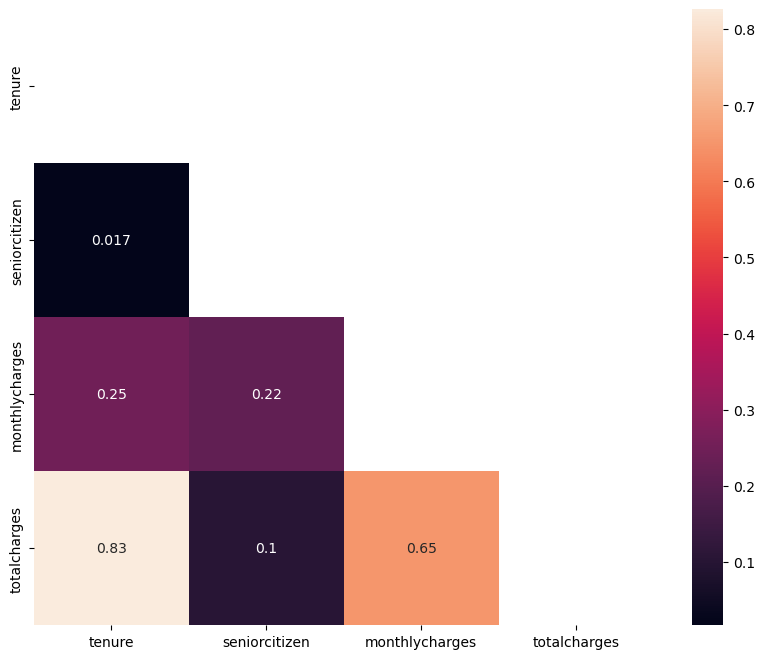

In [11]:
#Check correlation for each feature agaisnt each other
correlations_matrix = churnData__selected_features.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

Tenure and total charges has a high correlation 

# <span style="color:#7B241C">  04 Feature Preprocessing </span>

In [12]:
churnData__selected_features['seniorcitizen'].value_counts()

0    5901
1    1142
Name: seniorcitizen, dtype: int64

I scale the Features with min max scaler. 
I am interested to see the changes so I print the distribution before and after the transformation. 

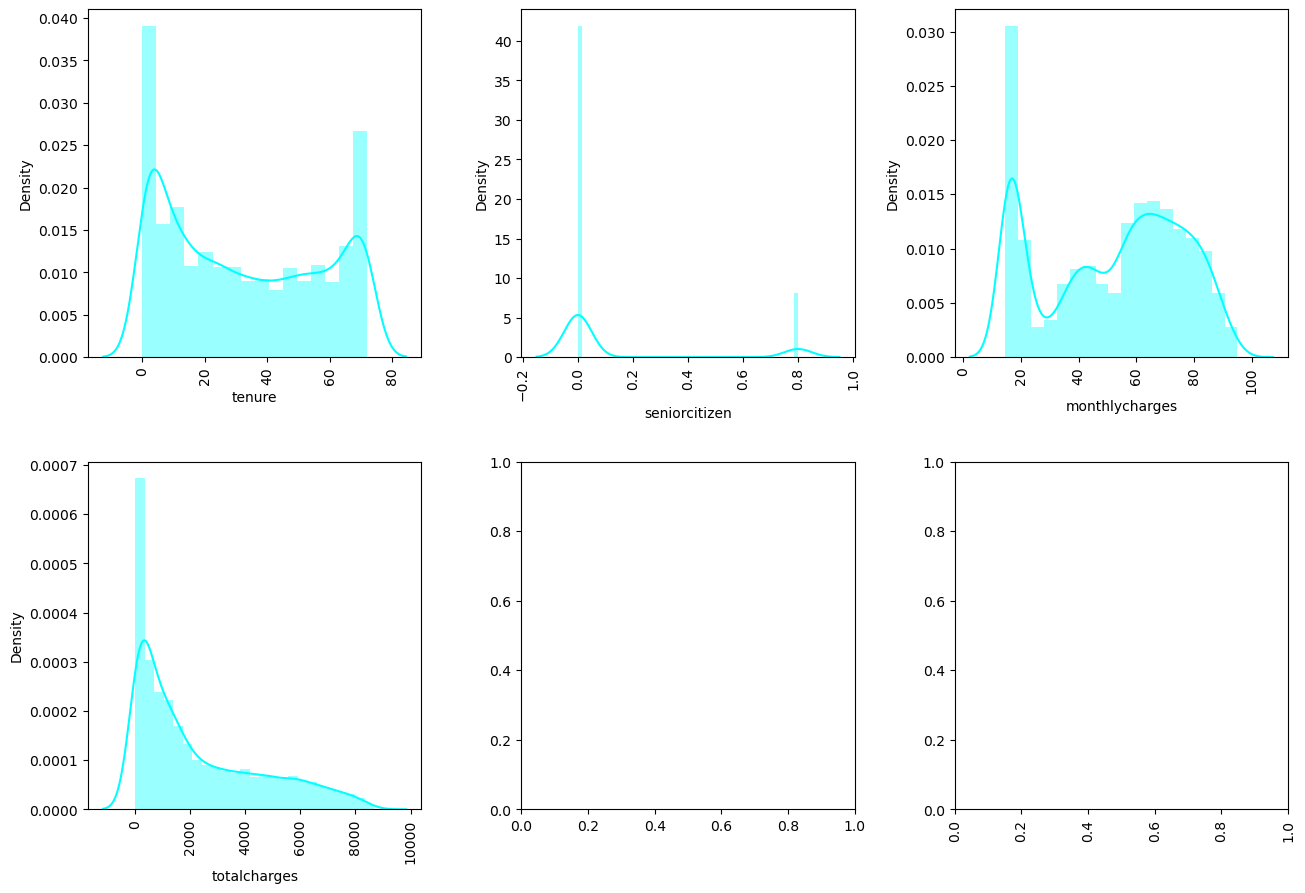

In [13]:
churnData_selected_features_num=churnData__selected_features[['tenure', 'monthlycharges','totalcharges']]
churnData_selected_features_cat=churnData__selected_features[[ 'seniorcitizen']]

# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(churnData__selected_features.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
plt.xticks(rotation=90)
for i, column in enumerate(churnData__selected_features.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(x=churnData__selected_features[column], ax=axes[row_idx, col_idx], color='cyan')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_xticklabels(axes[row_idx, col_idx].get_xticklabels(), rotation=90)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

In [14]:
#Range is set between 0 and 1 
#Min Max transformation
transformer = MinMaxScaler().fit(churnData_selected_features_num) 
x_minmax = transformer.transform(churnData_selected_features_num) #Array
churnData_selected_features_num_trans = pd.DataFrame(x_minmax,columns=churnData_selected_features_num.columns) ## Convert to dataframe


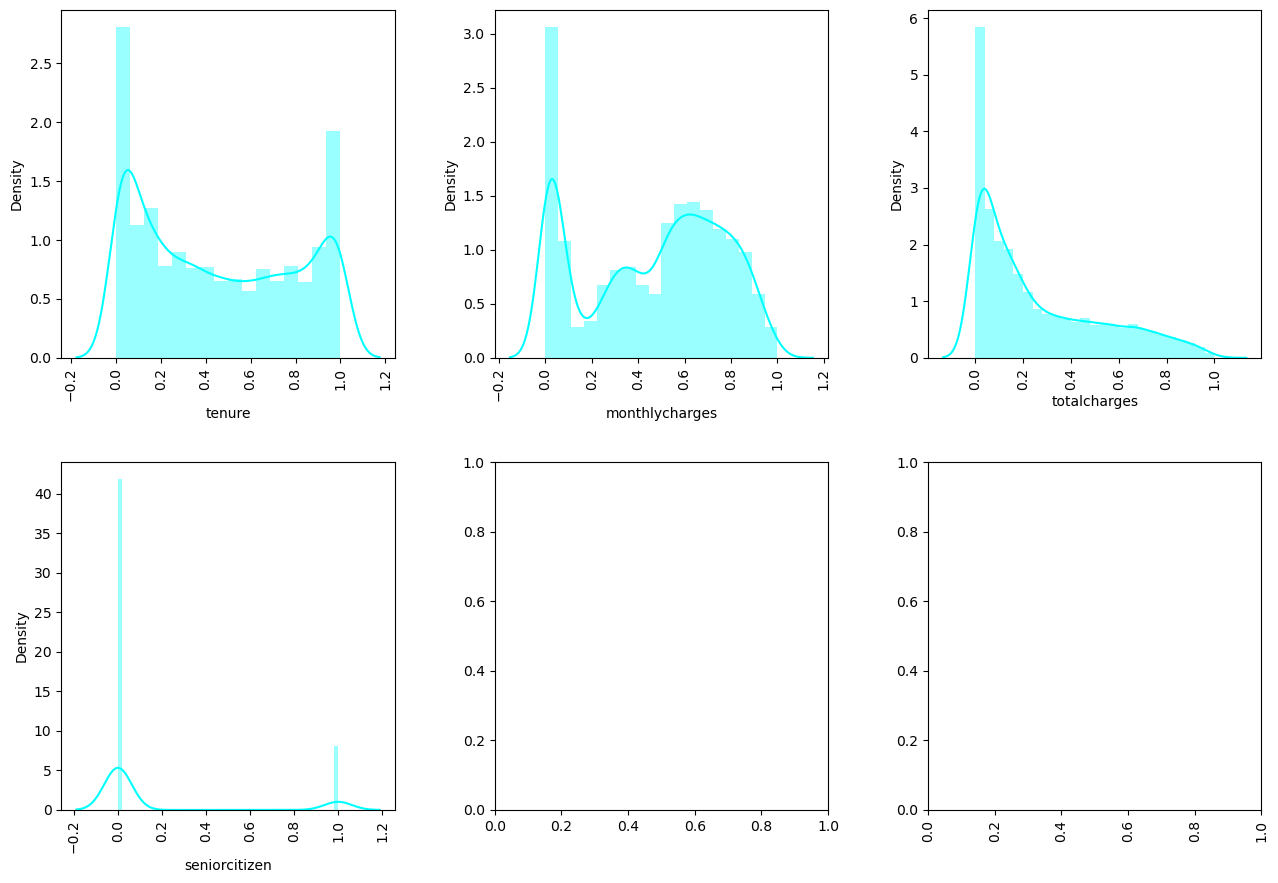

In [15]:
churnData_selected_features=pd.concat([churnData_selected_features_num_trans,churnData_selected_features_cat],axis=1)
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(churnData_selected_features.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
plt.xticks(rotation=90)
for i, column in enumerate(churnData_selected_features.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(x=churnData_selected_features[column], ax=axes[row_idx, col_idx], color='cyan')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_xticklabels(axes[row_idx, col_idx].get_xticklabels(), rotation=90)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

# <span style="color:#7B241C">  05 Model training </span>

## <span style="color:#7B241C"> 05.01 Smote upsampling </span>

In [19]:
#Prpare the data for upsampling
target=churnData_cleaned[['churn']].replace(["Yes","No"], [1,0])
data_smote=pd.concat([churnData_selected_features,target],axis=1)

In [20]:
# SMOTE only can handle numerical features. Therefore, if we want to use categoricals they 
# will need to be dummyfied. However, for sake of simplicity we will not include the categoricals.
smote = SMOTE()
y = data_smote['churn']
X = data_smote.drop(['churn'], axis=1)
X_sm, y_sm = smote.fit_resample(X, y)

unique, counts = np.unique(y_sm, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 5174]
 [   1 5174]]


In [21]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 42)

### <span style="color:#7B241C">  05.01.01 Random forest </span>

In [41]:
randfor = RandomForestRegressor(random_state=42).fit(X_train, y_train)
predictions = randfor.predict(X_test)

print(round(randfor.score(X_test, y_test),2))

0.41


I try now to cross validate to see if I can get a better score 

In [30]:
#Before train test I keep a test for the validation of the cross validation
X_master_train, X_master_test, y_master_train, y_master_test = train_test_split(X_sm, y_sm, test_size = 0.1, random_state = 20)


#train test split
#X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 42)

In [31]:
randfor = RandomForestRegressor(random_state=42)
cross_val_scores = cross_val_score(randfor, X_master_train, y_master_train, cv=10)
print(round(np.mean(cross_val_scores),3))

0.42


In [33]:
cross_val_scores

array([0.4363114 , 0.40335357, 0.41278293, 0.47145329, 0.44675995,
       0.38111492, 0.4242587 , 0.41907393, 0.39110937, 0.41542737])

score slightly better?

In [32]:
randfor.score(X_master_test, y_master_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<div class="alert alert-block alert-warning">
<b>warning:</b> Question. is this "randfor" the one trained in the cross_val_scores? Were is this saved? I want to test the cross validation against the test data I separated at the begining. where is the model saved? 
</div>

I want an automatic seacht for best paremeters. In this case I put random values for the parameters as I don´t really understand at the moment each one 

In [ ]:
param_grid = {
    'n_estimators': [10,20,30,40,50, 100],
    'max_depth' : [2,3,4,5,6,7,8,9,10],
    'criterion' : ['squared_error','absolute_error','friedman_mse','poisson']
    #'min_samples_split': [2, 4], 
    #'min_samples_leaf' : [1, 2,5],
    #'max_features': ['sqrt','log2']
    }

rfr = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rfr, param_grid, cv=10,return_train_score=True)
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

it is not working :( too long to run